# 1) Importing Libraries

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

# 2) Load Data

In [140]:
startup = pd.read_csv('Startups.csv')
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# 3) Data Analysis

In [141]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [142]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [143]:
mean = startup['Marketing Spend'].mean()
startup=startup.replace({'Marketing Spend': {0: mean}}) 
mean2 = startup['R&D Spend'].mean()
startup=startup.replace({'R&D Spend': {0: mean2}}) 

In [144]:
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2000,136897.80,471784.1000,New York,192261.83
1,162597.7000,151377.59,443898.5300,California,191792.06
2,153441.5100,101145.55,407934.5400,Florida,191050.39
3,144372.4100,118671.85,383199.6200,New York,182901.99
4,142107.3400,91391.77,366168.4200,Florida,166187.94
5,131876.9000,99814.71,362861.3600,New York,156991.12
6,134615.4600,147198.87,127716.8200,California,156122.51
7,130298.1300,145530.06,323876.6800,Florida,155752.60
8,120542.5200,148718.95,311613.2900,New York,152211.77
9,123334.8800,108679.17,304981.6200,California,149759.96


# 4) Data Visualization

C:\Users\afnan\Anaconda3 (64-bit)\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='line')` instead of `Series.plot('line',)`.
  """Entry point for launching an IPython kernel.


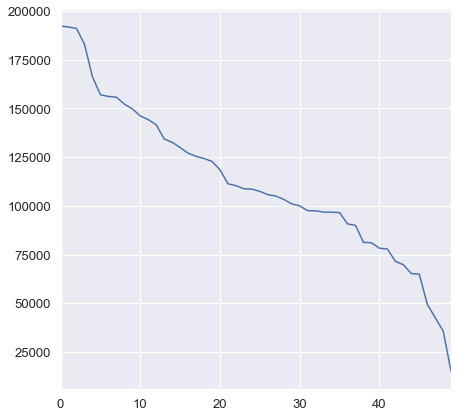

In [145]:
startup['Profit'].plot('line')


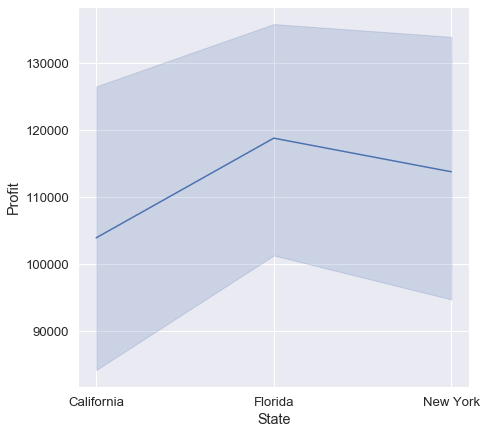

In [146]:
sns.lineplot(data = startup , x="State", y="Profit")
plt.show()

In [147]:
StateFinance = startup.groupby('State').sum()
StateFinance

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,1.246624e+06,2052690.62,3.314221e+06,1766387.98
Florida,1.291584e+06,1948302.36,3.957177e+06,1900384.39
New York,1.295316e+06,2066239.00,3.912932e+06,1933859.59


In [148]:
StateFinance2 = startup.groupby('State').mean()
StateFinance2

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,73330.805365,120746.507059,194954.170459,103905.175294
Florida,80724.016250,121768.897500,247323.551250,118774.024375
New York,76195.062353,121543.470588,230172.497976,113756.446471


C:\Users\afnan\Anaconda3 (64-bit)\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='line')` instead of `Series.plot('line',)`.
  """Entry point for launching an IPython kernel.


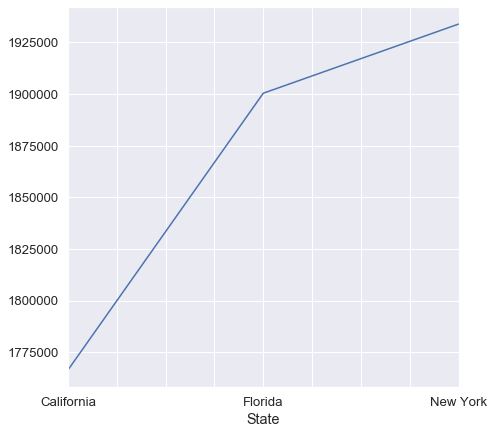

In [149]:
StateFinance['Profit'].plot('line')

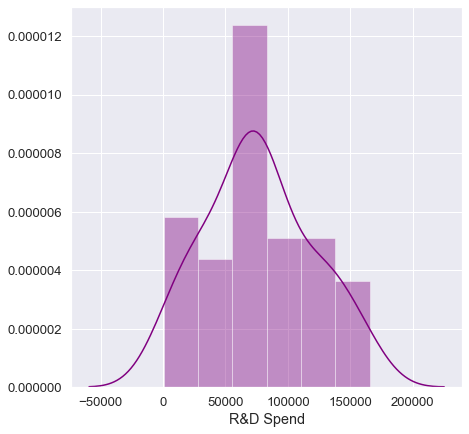

In [150]:
sns.distplot(startup['R&D Spend'], color='purple')
plt.show()

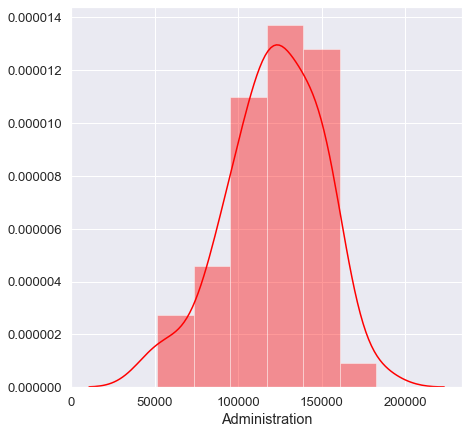

In [151]:
sns.distplot(startup['Administration'], color='red')
plt.show()

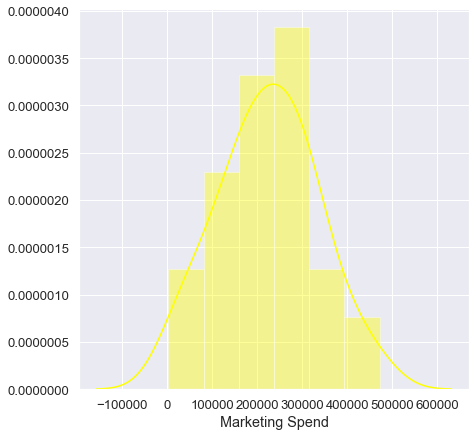

In [152]:
sns.distplot(startup['Marketing Spend'], color='yellow')
plt.show()

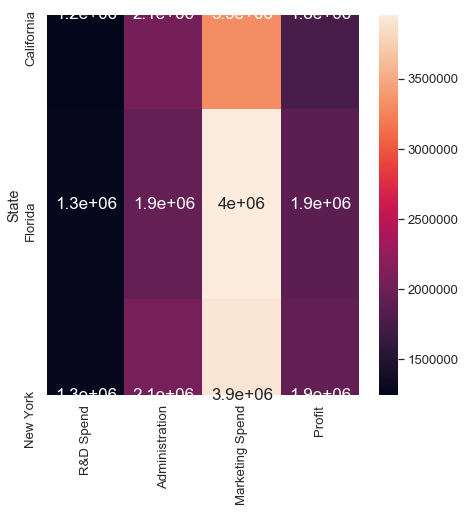

In [153]:
sns.heatmap(StateFinance, annot=True, annot_kws={"size": 17})
plt.show()

In [154]:
heatmap1_data = pd.pivot_table(startup, columns='Profit')
heatmap1_data

Profit,14681.40,35673.41,42559.73,49490.75,64926.08,65200.33,69758.98,71498.49,77798.83,78239.91,...,149759.96,152211.77,155752.60,156122.51,156991.12,166187.94,182901.99,191050.39,191792.06,192261.83
Administration,116983.8000,51743.1500,135426.9200,115816.21,124153.04,154806.14,127382.30,96189.63,84710.77,118546.05,...,108679.17,148718.95,145530.06,147198.87,99814.71,91391.77,118671.85,101145.55,151377.59,136897.8
Marketing Spend,45173.0600,211025.0978,211025.0978,297114.46,1903.93,28334.72,35534.17,148001.11,164470.71,172795.67,...,304981.62,311613.29,323876.68,127716.82,362861.36,366168.42,383199.62,407934.54,443898.53,471784.1
R&D Spend,73721.6156,542.0500,73721.6156,1315.46,1000.23,22177.74,15505.73,23640.93,27892.92,28754.33,...,123334.88,120542.52,130298.13,134615.46,131876.90,142107.34,144372.41,153441.51,162597.70,165349.2


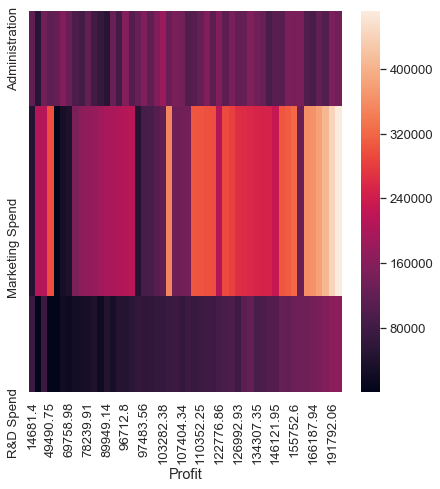

In [155]:
sns.heatmap(heatmap1_data)

In [156]:
startup.drop(['State'], axis=1, inplace=True)

# 5) Data Preprocessing

In [170]:
x = startup.iloc[:, :-1].values  # features 
y = startup.iloc[:, -1].values   # target

In [158]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


# 6) Train Model

In [159]:
model = LinearRegression().fit(x_train, y_train)

# 7) Test Model on `x_test`

In [160]:
y_pred = model.predict(x_test)
y_pred

array([100706.22, 124719.37, 125799.67,  69121.21, 173970.09, 119236.96,
        63888.51,  91562.76, 115517.42, 161849.16,  93508.21,  84548.37,
       103870.21,  93327.32, 125368.92])

# 8) Comparing predicted to actual values

In [161]:
np.concatenate(( y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1) ), axis=1)

array([[100706.22, 103282.38],
       [124719.37, 144259.4 ],
       [125799.67, 146121.95],
       [ 69121.21,  77798.83],
       [173970.09, 191050.39],
       [119236.96, 105008.31],
       [ 63888.51,  81229.06],
       [ 91562.76,  97483.56],
       [115517.42, 110352.25],
       [161849.16, 166187.94],
       [ 93508.21,  96778.92],
       [ 84548.37,  96479.51],
       [103870.21, 105733.54],
       [ 93327.32,  96712.8 ],
       [125368.92, 124266.9 ]])

# 9) Calculate R2 Score

In [164]:
model.score(x_train, y_train)

0.7855254639838211

In [165]:
model.score(x_test, y_test)

0.8672955928836124

In [166]:
r2_score(y_test, y_pred)

0.8672955928836124

# 10) Test Model on custom data

In [178]:
model.predict([[91749,114175 , 294919]])

array([125368.68])

# 11) Get Model Final Equation

In [174]:
model.coef_

array([0.65, 0.11, 0.09])

In [168]:
model.intercept_

27145.070611482937

Y = b0 + b1X1 + b2X2 + b3X3

# Profit = 27145 + 0.65 R&D Spend + 0.11 Administration + 0.09 Market Spend